<a href="https://colab.research.google.com/github/rootyJeon/deep_stat_study/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Class
- 랜덤 데이터 생성 및 plotting
- Numpy 기반 Gradient Descending 구현
- Pytorch 기반 Gradient Descending 구현

In [ ]:
import numpy as np

In [ ]:
?np.random.randn

In [ ]:
import time
def timer(func):
  def wrapper(*args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    computation_time = end_time - start_time
    print(f"Executation time of {func.__name__}: {computation_time} seconds")
    return result
  return wrapper

In [ ]:
true_b = 1
true_w = 2
N = 100 # number of data

np.random.seed(42)
x = np.random.rand(N,1)
epsilon = 0.1 * np.random.randn(N,1)
y = true_b + true_w * x + epsilon # data generation

In [ ]:
# Shuffles the indices
idx = np.arange(N)
split_index = int(N * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train data and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

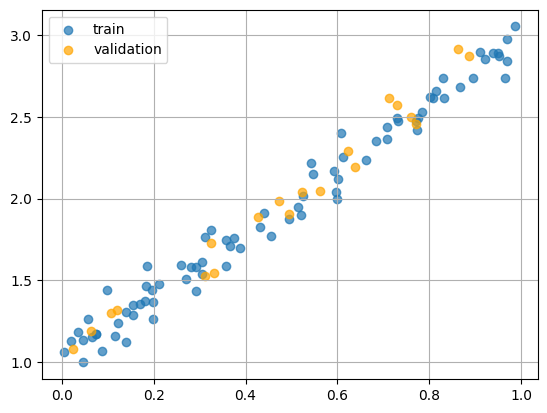

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, alpha=0.7, label='train')
plt.scatter(x_val, y_val, color='orange', alpha=0.7, label='validation')
plt.legend()
plt.grid()

In [ ]:
@timer
def train_model_numpy(lr=0.1, epochs=1000):

  # Initialize parameters
  b = np.random.randn(1)
  w = np.random.randn(1)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train
    error = (y_hat - y_train)
    mse_loss = np.mean(error ** 2)

    # Gradient computation
    b_grad = 2 * np.mean(error)
    w_grad = 2 * np.mean(x_train * error)
    b = b - lr * b_grad
    w = w - lr * w_grad

    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, mse_loss))

  return b, w

In [ ]:
b_hat, w_hat = train_model_numpy()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 1.5558947253513733
epoch: 50, loss: 0.007732399680758532
epoch: 100, loss: 0.007725710369168937
epoch: 150, loss: 0.007724227012488814
epoch: 200, loss: 0.007723898077701266
epoch: 250, loss: 0.007723825136313728
epoch: 300, loss: 0.00772380896153922
epoch: 350, loss: 0.007723805374778131
epoch: 400, loss: 0.007723804579412791
epoch: 450, loss: 0.007723804403040288
epoch: 500, loss: 0.0077238043639296355
epoch: 550, loss: 0.007723804355256836
epoch: 600, loss: 0.007723804353333638
epoch: 650, loss: 0.007723804352907168
epoch: 700, loss: 0.007723804352812602
epoch: 750, loss: 0.007723804352791627
epoch: 800, loss: 0.007723804352786976
epoch: 850, loss: 0.007723804352785943
epoch: 900, loss: 0.007723804352785721
epoch: 950, loss: 0.007723804352785674
Executation time of train_model_numpy: 0.03809762001037598 seconds
b_estimate:[1.02341376], w_estimate:[1.93680725]


In [ ]:
import torch

# create tensor at CPU
x_train_tensor = torch.as_tensor(x_train)
y_train_tensor = torch.as_tensor(y_train)

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

In [ ]:
@timer
def train_model_torch_(lr=0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    error = (y_hat - y_train_tensor)
    mse_loss = torch.mean(error ** 2)
    # Gradient Computation and descent
    mse_loss.backward()
    with torch.no_grad():
      b -= lr * b.grad
      w -= lr * w.grad
    b.grad.zero_()
    w.grad.zero_()

    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, mse_loss))
  return b, w

In [ ]:
b_hat, w_hat = train_model_torch_()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 2.081305540655837
epoch: 50, loss: 0.010442169778164685
epoch: 100, loss: 0.008326602917929693
epoch: 150, loss: 0.007857476444320019
epoch: 200, loss: 0.0077534466446551485
epoch: 250, loss: 0.007730377234509783
epoch: 300, loss: 0.007725261724730715
epoch: 350, loss: 0.0077241274549396275
epoch: 400, loss: 0.007723876040137949
epoch: 450, loss: 0.007723820235948276
epoch: 500, loss: 0.007723807881663119
epoch: 550, loss: 0.007723805136487023
epoch: 600, loss: 0.007723804528193519
epoch: 650, loss: 0.007723804392756275
epoch: 700, loss: 0.007723804362049461
epoch: 750, loss: 0.007723804354615012
epoch: 800, loss: 0.007723804354615012
epoch: 850, loss: 0.007723804354615012
epoch: 900, loss: 0.007723804354615012
epoch: 950, loss: 0.007723804354615012
Executation time of train_model_torch_: 0.161238431930542 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=88127fee697c7a1f26f5ed25c5b8eedf1c0ceb81025f05bbc139b87071c62df5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


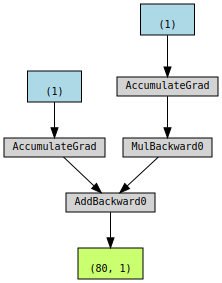

In [ ]:
from torchviz import make_dot
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
y_hat = b + w * x_train_tensor
make_dot(y_hat)

In [ ]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch(lr=0.1, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w

In [ ]:
b_hat, w_hat = train_model_torch()
print("b_estimate:{}, w_estimate:{}".format(b_hat, w_hat))

epoch: 0, loss: 0.4012533158754329
epoch: 50, loss: 0.029627638988592865
epoch: 100, loss: 0.012580975476576703
epoch: 150, loss: 0.008800889639398507
epoch: 200, loss: 0.00796264683762957
epoch: 250, loss: 0.007776766567908213
epoch: 300, loss: 0.0077355480894485944
epoch: 350, loss: 0.007726408303772424
epoch: 400, loss: 0.007724381657675169
epoch: 450, loss: 0.007723932395803293
epoch: 500, loss: 0.0077238327389754086
epoch: 550, loss: 0.007723810647448275
epoch: 600, loss: 0.0077238057530565184
epoch: 650, loss: 0.007723804667609866
epoch: 700, loss: 0.007723804423353265
epoch: 750, loss: 0.007723804368786134
epoch: 800, loss: 0.007723804356563129
epoch: 850, loss: 0.007723804354563772
epoch: 900, loss: 0.007723804354563772
epoch: 950, loss: 0.007723804354563772
Executation time of train_model_torch: 0.21133208274841309 seconds
b_estimate:tensor([1.0234], requires_grad=True), w_estimate:tensor([1.9368], requires_grad=True)


In [ ]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch2(lr=0.01, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2 )
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w, w2

In [ ]:
b_hat, w_hat, w2_hat = train_model_torch2()
print("b_estimate:{}, w_estimate:{}, w2_estimate:{}".format(b_hat, w_hat, w2_hat))

epoch: 0, loss: 0.8587775577325862
epoch: 50, loss: 0.0664451367821873
epoch: 100, loss: 0.01915843786132932
epoch: 150, loss: 0.015847931427406075
epoch: 200, loss: 0.015239625495082404
epoch: 250, loss: 0.014817565653610665
epoch: 300, loss: 0.01442731144940752
epoch: 350, loss: 0.014058367820700782
epoch: 400, loss: 0.013709065763205793
epoch: 450, loss: 0.013378322423996461
epoch: 500, loss: 0.013065155396421824
epoch: 550, loss: 0.012768630988912838
epoch: 600, loss: 0.012487864768747869
epoch: 650, loss: 0.012222018496764991
epoch: 700, loss: 0.011970300168925134
epoch: 750, loss: 0.01173195831655005
epoch: 800, loss: 0.011506279147776147
epoch: 850, loss: 0.011292597005069665
epoch: 900, loss: 0.011090268340926962
epoch: 950, loss: 0.010898690238387151
Executation time of train_model_torch2: 0.2511928081512451 seconds
b_estimate:tensor([0.9287], requires_grad=True), w_estimate:tensor([2.5039], requires_grad=True), w2_estimate:tensor([-0.5491], requires_grad=True)


## Quiz 1
- Test(Validation) Set MSE 계산

In [ ]:
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)
y_val_pred = b_hat + w_hat * x_val_tensor
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.0098, dtype=torch.float64, grad_fn=<MseLossBackward0>)

## Quiz 2
- 새 데이터에 대한 모델 생성
- (원 함수를 모른다는 가정 하에) 분포상 3차함수 그래프의 개형을 가지고 3차 polynomial 형태로 모델링 시도
- 그러나 learning rate의 한계로 주어진 시간 내에 원본 개형을 그대로 모사할 수 없음

In [ ]:
import pickle

with open('quiz_data.pkl', 'rb') as f:
	data = pickle.load(f)

In [ ]:
len(data['x'])

100

In [ ]:
# Shuffles the indices
idx = np.arange(len(data['x']))
split_index = int(len(data['x']) * 0.8)

train_idx = idx[:split_index]
val_idx = idx[split_index:]

# Generates train data and validation sets
x_train, y_train = data['x'][train_idx], data['y'][train_idx]
x_val, y_val = data['x'][val_idx], data['y'][val_idx]

# create tensor at GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)

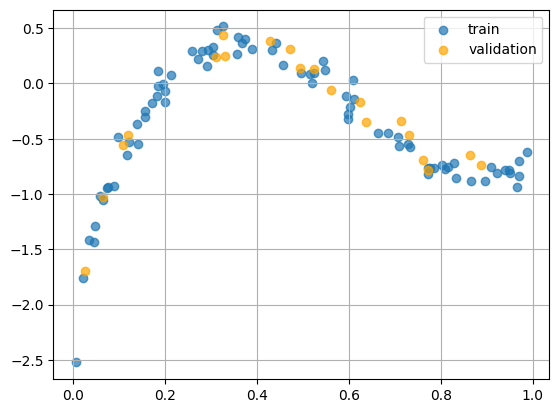

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, alpha=0.7, label='train')
plt.scatter(x_val, y_val, color='orange', alpha=0.7, label='validation')
plt.legend()
plt.grid()

In [215]:
import torch.optim as optim
import torch.nn as nn
@timer
def train_model_torch3(lr=0.01, epochs=1000):
  # Initialize parameters
  b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w2 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  w3 = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
  parameters = [b, w, w2, w3]
  optimizer = optim.SGD(parameters, lr=lr)
  mse_loss = nn.MSELoss()

  for epoch in range(epochs):
    # Loss computation
    y_hat = b + w * x_train_tensor + w2 * (x_train_tensor ** 2 ) + w3 * (x_train_tensor ** 3)
    loss = mse_loss(y_hat, y_train_tensor)
    # Gradient Computation and descent
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 50 == 0:
      print("epoch: {}, loss: {}".format(epoch, loss))
  return b, w, w2, w3

In [216]:
b_hat, w_hat, w2_hat, w3_hat = train_model_torch3()
print("b_estimate:{}, w_estimate:{}, w2_estimate:{}, w3_estimate:{}".format(b_hat, w_hat, w2_hat, w3_hat))

epoch: 0, loss: 0.8971474113990968
epoch: 50, loss: 0.5415286235443684
epoch: 100, loss: 0.4490652275829302
epoch: 150, loss: 0.3932888316319508
epoch: 200, loss: 0.355006322151969
epoch: 250, loss: 0.32830655242217166
epoch: 300, loss: 0.30952571668045287
epoch: 350, loss: 0.2961746106391288
epoch: 400, loss: 0.2865491647653287
epoch: 450, loss: 0.2794821770621324
epoch: 500, loss: 0.2741740080632068
epoch: 550, loss: 0.2700768396239423
epoch: 600, loss: 0.26681536652229076
epoch: 650, loss: 0.2641324033172271
epoch: 700, loss: 0.2618517288156693
epoch: 750, loss: 0.2598525549701828
epoch: 800, loss: 0.2580520401041055
epoch: 850, loss: 0.2563933692731292
epoch: 900, loss: 0.2548375458301086
epoch: 950, loss: 0.2533578045895563
Executation time of train_model_torch3: 0.8150293827056885 seconds
b_estimate:tensor([-0.3651], requires_grad=True), w_estimate:tensor([0.7263], requires_grad=True), w2_estimate:tensor([-0.8251], requires_grad=True), w3_estimate:tensor([-0.3984], requires_grad=

In [217]:
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)
y_val_pred = b_hat + w_hat * x_val_tensor + w2_hat * (x_val_tensor ** 2 )  + w3_hat * (x_val_tensor ** 3)
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.2278, dtype=torch.float64, grad_fn=<MseLossBackward0>)

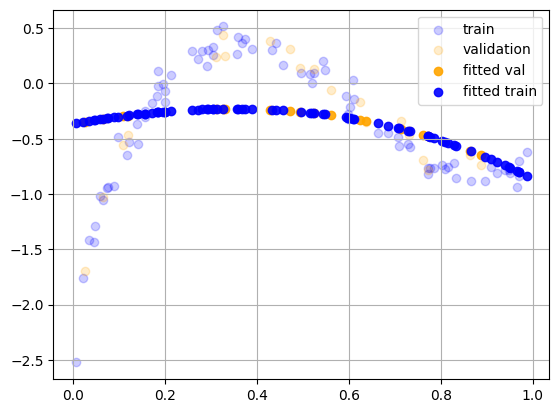

In [218]:
import matplotlib.pyplot as plt
y_train_pred = b_hat + w_hat * x_train_tensor + w2_hat * (x_train_tensor ** 2 )  + w3_hat * (x_train_tensor ** 3)
plt.scatter(x_train, y_train, alpha=0.2, label='train',color='b')
plt.scatter(x_val, y_val, color='orange', alpha=0.2, label='validation')
plt.scatter(x_val, y_val_pred.tolist(), color='orange', alpha=0.9, label='fitted val')
plt.scatter(x_train, y_train_pred.tolist(), alpha=0.9, label='fitted train',color='b')
plt.legend()
plt.grid()

### Quiz 2 번외
- 제한시간을 고려하지 않으면 언젠가는 원본 함수 형태에 근사할 수 있을까?
- 모든 조건을 고정하고 epoch를 100만 회로 설정
- 최종적으로 수렴은 하나 학습 시간의 관점에서 가치가 없는 모델로 사료됨

In [221]:
b_hat, w_hat, w2_hat, w3_hat = train_model_torch3(epochs=1000000)
print("b_estimate:{}, w_estimate:{}, w2_estimate:{}, w3_estimate:{}".format(b_hat, w_hat, w2_hat, w3_hat))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
epoch: 750100, loss: 0.019977316506915983
epoch: 750150, loss: 0.019975839274039855
epoch: 750200, loss: 0.019974362183647145
epoch: 750250, loss: 0.019972885242043527
epoch: 750300, loss: 0.019971408436583106
epoch: 750350, loss: 0.019969931279320268
epoch: 750400, loss: 0.019968454764994044
epoch: 750450, loss: 0.019966978386751644
epoch: 750500, loss: 0.01996550215099268
epoch: 750550, loss: 0.01996402556357792
epoch: 750600, loss: 0.019962549612588084
epoch: 750650, loss: 0.01996107380408164
epoch: 750700, loss: 0.019959598144379535
epoch: 750750, loss: 0.019958122620805405
epoch: 750800, loss: 0.019956646745524484
epoch: 750850, loss: 0.0199551715067195
epoch: 750900, loss: 0.019953696416743653
epoch: 750950, loss: 0.019952221462870984
epoch: 751000, loss: 0.01995074665148175
epoch: 751050, loss: 0.019949271988846613
epoch: 751100, loss: 0.019947796961714497
epoch: 751150, loss: 0.019946322583913843
epoch: 751200, loss: 0.019944848342226047
epoc

In [264]:
x_val_tensor = torch.as_tensor(x_val).to(device)
y_val_tensor = torch.as_tensor(y_val).to(device)
y_val_pred = b_hat + w_hat * x_val_tensor + w2_hat * (x_val_tensor ** 2 )  + w3_hat * (x_val_tensor ** 3)
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.0101, dtype=torch.float64, grad_fn=<MseLossBackward0>)

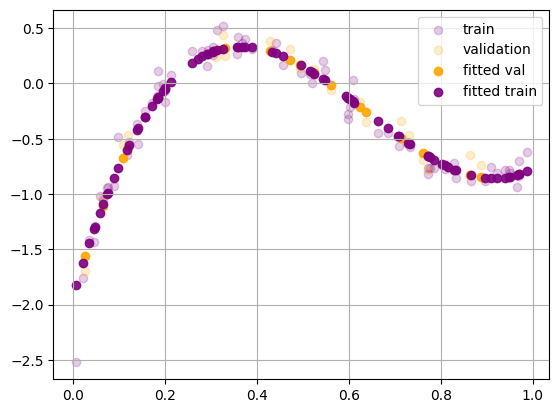

In [265]:
import matplotlib.pyplot as plt
y_train_pred = b_hat + w_hat * x_train_tensor + w2_hat * (x_train_tensor ** 2 )  + w3_hat * (x_train_tensor ** 3)
plt.scatter(x_train, y_train, alpha=0.2, label='train',color='purple')
plt.scatter(x_val, y_val, color='orange', alpha=0.2, label='validation')
plt.scatter(x_val, y_val_pred.tolist(), color='orange', alpha=0.9, label='fitted val')
plt.scatter(x_train, y_train_pred.tolist(), alpha=0.9, label='fitted train',color='purple')
plt.legend()
plt.grid()

### Quiz 2 번외2 - OLS 추정 결과와 비교
- 같은 방식의 3차 polynomial 선형 방정식을 OLS는 어떻게 추정할까?
- pandas와 statsmodels 모델로 OLS 추정 및 가설검정 결과 확인
- 3차항으로도 통계적 유의성은 확보 가능
- 하지만 원함수의 형태에 대한 최소한의 추론 없이 구현 불가능하다는 점에서 더 복잡한 문제에는 이러한 모수적 OLS를 적용할 수는 없을 것

In [230]:
import pandas as pd
X = pd.DataFrame(x_train)
X

,0
0,0.374540
1,0.950714
2,0.731994
3,0.598658
4,0.156019
...,...
75,0.729007
76,0.771270
77,0.074045
78,0.358466


In [258]:
import statsmodels.api as sm
import pandas as pd
X = pd.DataFrame(x_train, columns=['x'])
X['x^2'] = X['x']**2
X['x^3'] = X['x']**3
X = sm.add_constant(X)
X.columns = ['b','w','w2','w3']
stat_model = sm.OLS(y_train, sm.add_constant(X)).fit()
print(stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     650.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.34e-54
Time:                        05:40:01   Log-Likelihood:                 62.540
No. Observations:                  80   AIC:                            -117.1
Df Residuals:                      76   BIC:                            -107.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
b             -2.0520      0.047    -43.382      0.0

In [261]:
print("OLS 추정 결과 Parameters")
print(stat_model.params)
print("\nepoch 100만회 결과 Parameters")
print('b:   ', float(b))
print('w:   ', float(w_hat))
print('w2:  ', float(w2_hat))
print('w3:  ', float(w3_hat))

OLS 추정 결과 Parameters
b     -2.051958
w     15.890582
w2   -31.409089
w3    16.921576
dtype: float64

epoch 100만회 결과 Parameters
b:    -1.3004688024520874
w:    14.150156021118164
w2:   -27.175617218017578
w3:   14.160837173461914


In [266]:
y_val_pred = stat_model.params[0] + stat_model.params[1] * x_val_tensor + stat_model.params[2] * (x_val_tensor ** 2 )  + stat_model.params[3] * (x_val_tensor ** 3)
mse_loss = nn.MSELoss()
loss = mse_loss(y_val_pred, y_val_tensor)
loss

tensor(0.0117, dtype=torch.float64)

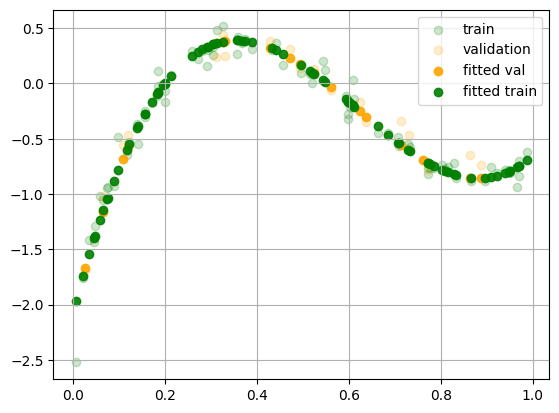

In [267]:
import matplotlib.pyplot as plt
y_train_pred = stat_model.params[0] + stat_model.params[1] * x_train_tensor + stat_model.params[2] * (x_train_tensor ** 2 )  + stat_model.params[3] * (x_train_tensor ** 3)
plt.scatter(x_train, y_train, alpha=0.2, label='train',color='g')
plt.scatter(x_val, y_val, color='orange', alpha=0.2, label='validation')
plt.scatter(x_val, y_val_pred.tolist(), color='orange', alpha=0.9, label='fitted val')
plt.scatter(x_train, y_train_pred.tolist(), alpha=0.9, label='fitted train',color='g')
plt.legend()
plt.grid()